<a href="https://colab.research.google.com/github/Kartikeya45/seam-carving/blob/main/seam_carving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SEAM CARVING 

## Team:
- B L Siddhartha Bhat - 200905010
- Kartikeya Angara - 200905038
- Yashas Kamath - 200905132
- Preetham M - 200905138

# Introduction

__Seam carving__ (or __liquid rescaling__) is an algorithm for content-aware image resizing, developed by Shai Avidan, of Mitsubishi Electric Research Laboratories (MERL), and Ariel Shamir, of the Interdisciplinary Center and MERL. It functions by establishing a number of seams (paths of least importance) in an image and automatically removes seams to reduce image size or inserts seams to extend it. Seam carving also allows manually defining areas in which pixels may not be modified, and features the ability to remove whole objects from photographs.

The purpose of the algorithm is image retargeting, which is the problem of displaying images without distortion on media of various sizes (cell phones, projection screens) using document standards, like HTML, that already support dynamic changes in page layout and text but not images.

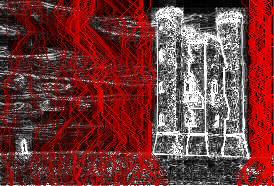

In [10]:
%cd /content

/content


In [11]:
!rm -r seam-carving

In [12]:
!ls
!pwd

sample_data
/content


In [1]:
!git clone https://github.com/Kartikeya45/seam-carving.git
%cd ./seam-carving

Cloning into 'seam-carving'...
remote: Enumerating objects: 319, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 319 (delta 1), reused 0 (delta 0), pack-reused 313
Receiving objects: 100% (319/319), 16.16 MiB | 27.67 MiB/s, done.
Resolving deltas: 100% (145/145), done.
/content/seam-carving


## Read .pnm files and matrix

In [2]:
from PIL import Image
import numpy as np
def show_pnm(file_name):
    with open(file_name, 'r') as f:
        vals = f.read().split()
        w = int(vals[1])
        h = int(vals[2])
        if vals[0] == 'P2': # Grayscale
            pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w))
        elif vals[0] == 'P3': # RGB
            pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w, 3))
        else:
            return None

    return Image.fromarray(pixels)

def show_matrix(matrix_file):
    '''
    input: filename
    output: show matrix

    Each element on the same line is sperated by a space
    '''
    m = np.loadtxt(matrix_file)
    m = m + m.min()
    m = m / m.max()
    m = m * 255
    m = m.astype(np.uint8)
    return Image.fromarray(m)

## Compile

In [3]:
!nvcc -rdc=true ./main.cu ./src/*/* -o ./result/exe/seamCarving

## Args:
- The excution file will appear in __./result/exe__
- <mark>arg[0]</mark> ./result/exe/seamCarving
- <mark>arg[1]</mark> an input file (see ./images)
- <mark>arg[2]</mark> name of the output file with no extension (there will be 2 file _host and _device in ../result/)
- <mark>arg[3]</mark> new width

## Broadcast tower image

In [9]:
!./result/exe/seamCarving ./images/broadcast_tower.pnm ./result/broadcast_tower 150 16 16

Image size (width x height): 274 x 186

Processing time of device: 48.350273 ms



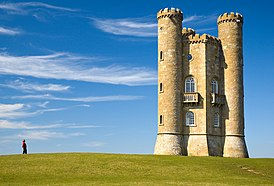

In [6]:
show_pnm('./images/broadcast_tower.pnm')

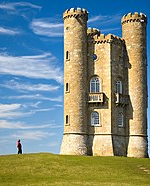

In [7]:
show_pnm('./result/broadcast_tower_device.pnm')

## Clock image

In [10]:
!./result/exe/seamCarving ./images/clock.pnm ./result/clock 312

Image size (width x height): 788 x 599

Processing time of device: 615.866882 ms



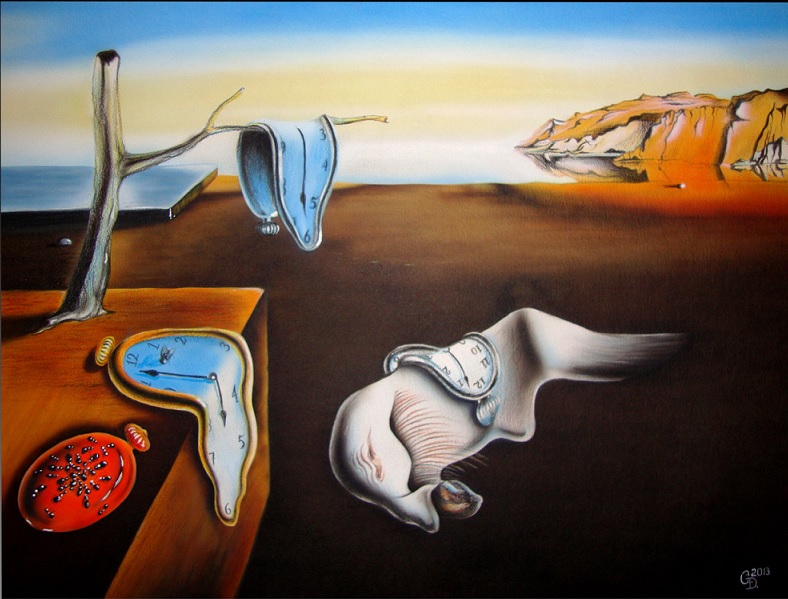

In [11]:
show_pnm('./images/clock.pnm')

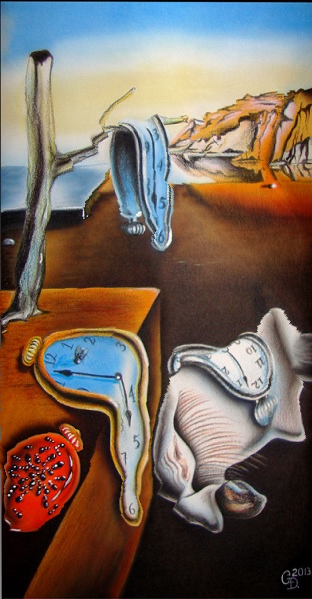

In [12]:
show_pnm('./result/clock_device.pnm')

## Cat image

In [13]:
!./result/exe/seamCarving ./images/cat.pnm ./result/cat 150

Image size (width x height): 240 x 320

Processing time of device: 57.303104 ms



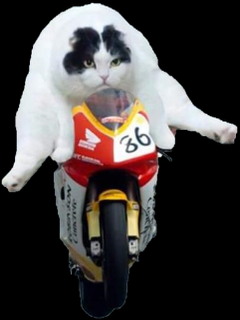

In [14]:
show_pnm('./images/cat.pnm')

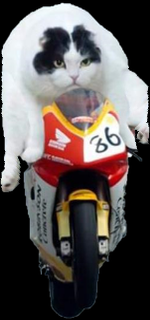

In [15]:
show_pnm('./result/cat_device.pnm')

## Elephant image

In [16]:
!./result/exe/seamCarving ./images/elephant.pnm ./result/elephant 300

Image size (width x height): 787 x 444

Processing time of device: 557.556519 ms



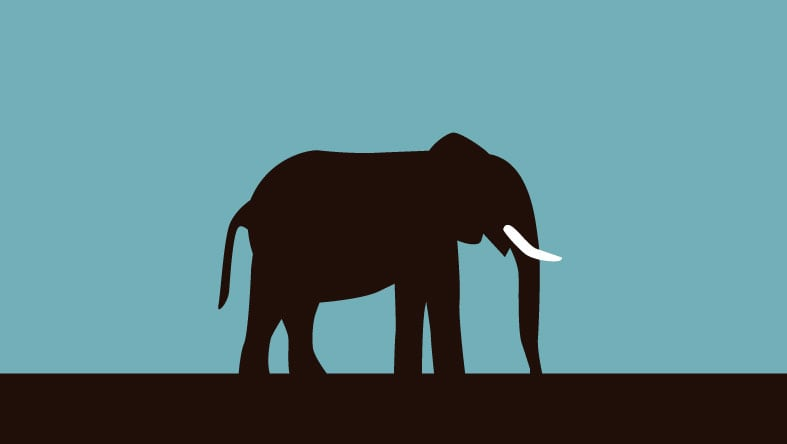

In [17]:
show_pnm('./images/elephant.pnm')

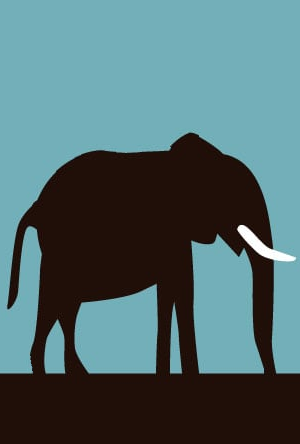

In [18]:
show_pnm('./result/elephant_device.pnm')

## Snail image

In [19]:
!./result/exe/seamCarving ./images/snail.pnm ./result/snail 150

Image size (width x height): 256 x 256

Processing time of device: 58.603424 ms



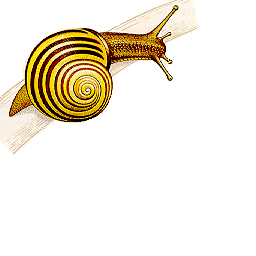

In [20]:
show_pnm('./images/snail.pnm')

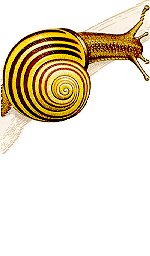

In [21]:
show_pnm('./result/snail_device.pnm')